In [112]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as m
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [33]:
data = pd.read_csv('Group 9 Employee Attrition.csv', sep='\t')
data.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,80,0,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,80,1,10,3,3,10,7,1,7,No


In [34]:
del data['EmployeeNumber']
del data['Over18']

In [35]:
data.iloc[:5,[1,3,6,9,13,15,19,32]]

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Attrition
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes,No
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No,No


In [38]:
X = data.iloc[:, :-1].values
y = data.iloc[:,-1].values

In [41]:
X[:5,[1,3,6,9,13,15,19]]

array([['Travel_Rarely', 'Sales', 'Life Sciences', 'Female',
        'Sales Executive', 'Single', 'Yes'],
       ['Travel_Frequently', 'Research & Development', 'Life Sciences',
        'Male', 'Research Scientist', 'Married', 'No'],
       ['Travel_Rarely', 'Research & Development', 'Other', 'Male',
        'Laboratory Technician', 'Single', 'Yes'],
       ['Travel_Frequently', 'Research & Development', 'Life Sciences',
        'Female', 'Research Scientist', 'Married', 'Yes'],
       ['Travel_Rarely', 'Research & Development', 'Medical', 'Male',
        'Laboratory Technician', 'Married', 'No']], dtype=object)

In [43]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
nos = [1,3,6,9,13,15,19]
for no in nos:
    X[:,no] = encoder.fit_transform(X[:,no])

y = encoder.fit_transform(y)


In [45]:
from sklearn.preprocessing import OneHotEncoder

hotencoder = OneHotEncoder(categorical_features=[1,3,6,13,15])
X = hotencoder.fit_transform(X).toarray()

In [46]:
X[0:1]

array([[  0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          4.10000000e+01,   1.10200000e+03,   1.00000000e+00,
          2.00000000e+00,   1.00000000e+00,   2.00000000e+00,
          0.00000000e+00,   9.40000000e+01,   3.00000000e+00,
          2.00000000e+00,   4.00000000e+00,   5.99300000e+03,
          1.94790000e+04,   8.00000000e+00,   1.00000000e+00,
          1.10000000e+01,   3.00000000e+00,   1.00000000e+00,
          8.00000000e+01,   0.00000000e+00,   8.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   6.00000000e+00,
        

In [47]:
# Splitting data into test and train

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [48]:
# Standardizing data

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Using Decision Tree model

In [51]:
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [52]:
print('Training accuracy: ', dt.score(X_train, y_train))
print('Testing accuracy: ',dt.score(X_test, y_test ))

Training accuracy:  1.0
Testing accuracy:  0.816326530612


In [59]:
predtrain = dt.predict(X_train)
predtest = dt.predict(X_test)

print('Traning accuracy: ', m.accuracy_score(y_train, predtrain))
print('Traning accuracy: ', m.accuracy_score(y_test, predtest))

Traning accuracy:  1.0
Traning accuracy:  0.816326530612


In [70]:
# fpr, tpr, thresholds = m.ro
# (m.auc(y_train, predtrain))
print('AUC training: ', m.roc_auc_score(y_train, predtrain))
print('AUC testing: ', m.roc_auc_score(y_test, predtest))

AUC training:  1.0
AUC testing:  0.67868504772


## Using Random forest

In [115]:
errortest = []
errortrain = []
for i in range(1,101):
    rf = RandomForestClassifier(n_estimators=i, bootstrap=True, max_features='auto')

    rf.fit(X_train, y_train)
    val = 1-rf.score(X_test, y_test)
    errortest.append(val)
    val = 1-rf.score(X_train, y_train)
    errortrain.append(val)
    

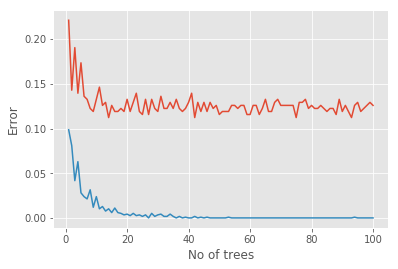

In [118]:
plt.plot(range(1,101), errortest)
plt.plot(range(1,101), errortrain)
plt.xlabel('No of trees')
plt.ylabel('Error')
plt.show()

In [133]:
rf = RandomForestClassifier(n_estimators=42, bootstrap=True, max_features='auto')

rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=42, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [134]:
print('Training accuracy: ',rf.score(X_train, y_train))
print('Testing accuracy: ',rf.score(X_test, y_test))

Training accuracy:  0.998299319728
Testing accuracy:  0.87074829932


In [135]:
predtrain = rf.predict(X_train)
predtest = rf.predict(X_test)

print('AUC training: ', m.roc_auc_score(y_train, predtrain))
print('AUC testing: ', m.roc_auc_score(y_test, predtest))

AUC training:  0.994897959184
AUC testing:  0.557023040586


## Using Bagging

In [119]:
errortest = []
errortrain = []
for i in range(1,101):
    bg = BaggingClassifier(DecisionTreeClassifier(), max_features=1.0, n_estimators=i)

    bg.fit(X_train, y_train)
    val = 1-bg.score(X_test, y_test)
    errortest.append(val)
    val = 1-bg.score(X_train, y_train)
    errortrain.append(val)
    

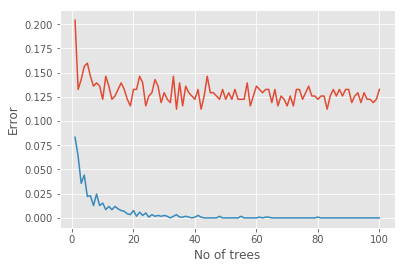

In [120]:
plt.plot(range(1,101), errortest)
plt.plot(range(1,101), errortrain)
plt.xlabel('No of trees')
plt.ylabel('Error')
plt.show()

In [130]:
bg = BaggingClassifier(DecisionTreeClassifier(), max_features=1.0, n_estimators=42)

bg.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=42, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [131]:
print('Training accuracy: ',bg.score(X_train, y_train))
print('Training accuracy: ',bg.score(X_test, y_test))

Training accuracy:  0.997448979592
Training accuracy:  0.874149659864


In [132]:
predtrain = bg.predict(X_train)
predtest = bg.predict(X_test)

print('AUC training: ', m.roc_auc_score(y_train, predtrain))
print('AUC testing: ', m.roc_auc_score(y_test, predtest))

AUC training:  0.992346938776
AUC testing:  0.599874674636


## Using boosting

In [121]:
errortest = []
errortrain = []
for i in range(1,101):
    ada = AdaBoostClassifier(learning_rate=1, n_estimators=i)

    ada.fit(X_train, y_train)
    val = 1-ada.score(X_test, y_test)
    errortest.append(val)
    val = 1-ada.score(X_train, y_train)
    errortrain.append(val)

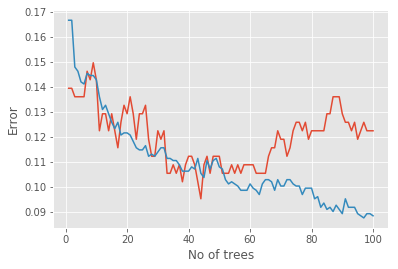

In [122]:
plt.plot(range(1,101), errortest)
plt.plot(range(1,101), errortrain)
plt.xlabel('No of trees')
plt.ylabel('Error')
plt.show()

In [127]:
ada = AdaBoostClassifier(learning_rate=1, n_estimators=50)

ada.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
          n_estimators=50, random_state=None)

In [128]:
print('Training accuracy: ',ada.score(X_train, y_train))
print('Training accuracy: ',ada.score(X_test, y_test))

Training accuracy:  0.892006802721
Training accuracy:  0.887755102041


In [129]:
predtrain = ada.predict(X_train)
predtest = ada.predict(X_test)

print('AUC training: ', m.roc_auc_score(y_train, predtrain))
print('AUC testing: ', m.roc_auc_score(y_test, predtest))

AUC training:  0.720918367347
AUC testing:  0.689530511906
